In [1]:
import numpy as np
import matplotlib.pyplot as mt
from scipy.linalg import eigh_tridiagonal
#Funciones utilizadas------------------------------------

#Diagonalización de  matrices tridiagonales
def diagonalizar_tridiagonal_simetrica(diagonal_principal, diagonal_superior):
    # Calcular autovalores y autovectores
    autovalores, autovectores = eigh_tridiagonal(diagonal_principal, diagonal_superior, eigvals_only=False)
    return autovalores,autovectores


In [2]:
#PROGRAMA--------------------------------------------------

N=3000 #Número par
s=1/2#Spin individual
S=int(N*s)#Spin total
Ms=np.arange(S, -S - 1, -1)
Ms=Ms.astype(float)



#Matriz S_z----------------
S_z=np.diag(Ms)

#Matriz S_+----------------


def s_mas(m):
    return np.sqrt(S*(S+1)-m*(m+1))

S_mas = np.zeros((2*S+1, 2*S+1))
s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

for i in range(len(s_mas_vector)):
    S_mas[i, i + 1] = s_mas_vector[i]

#Matriz S_- -------------    

def s_menos(m):
    return np.sqrt(S*(S+1)-m*(m-1))

S_menos = np.zeros((2*S+1, 2*S+1))
s_menos_vector= s_menos(np.arange(S, -S, -1))
for i in range(len(s_menos_vector)):
    S_menos[i+1, i] = s_menos_vector[i]


#Matriz S_x

S_x=1/2 * (S_mas + S_menos)

Consideramos el hamiltoniano con el término cuadrático de  $S_{z}$, el de acoplo con el campo magnético externo y el de interacción de 4 spines:
\begin{equation}
H_{0} = -\frac{4 J}{N} (S_{z})^{2}-2hS_{x}-\frac{16K}{N^{3}} (S_{z})^{4}
\end{equation}

In [3]:
J=1
h=2.2
K=1

H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x-(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms)

#Obtenemos las autoenergías diagonalizando la matriz:
autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))

Añadimos de nuevo el término de ruptura de simetría para romper la degeneración de los estados cuando aparezcan. El hamiltoniano queda: 
\begin{equation}
H = H_{0} + \epsilon S_{Z}
\end{equation}


In [4]:
J=1
h=0.5
K=0.1
epsilon=10**(-6)


H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x-(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms) + epsilon*np.diag(Ms)

#Obtenemos las autoenergías diagonalizando la matriz:
autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))

Ahora ya podemos calcular el valor esperado del operador $S_{Z}$ y así dar un valor a la magnetización en cada autoestado de nuestro sistema:

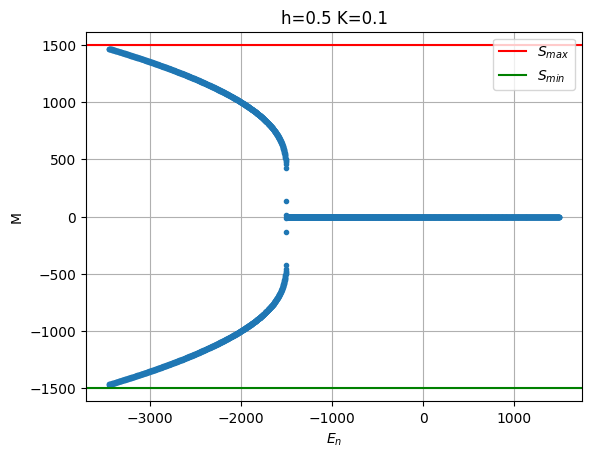

In [5]:
magn=[]
for i in range(int(N+1)):
    magn.append((autovectores[:,i] @ (Ms*autovectores[:,i]).T))
#Representación del valor promedio de S_z normalizado frente a las energías obtenidas
mt.plot(autoenergias,magn,'.')
mt.axhline(y=N/2,color='red',label="$S_{max}$")
mt.axhline(y=-N/2,color='green',label="$S_{min}$")
mt.xlabel("$E_{n}$")
mt.ylabel("M")
mt.title(f'h={h} K={K}')
mt.legend()
mt.grid()
mt.show()

A continuación observaremos las QPTs del nuevo sistema modificado. De nuevo, aparece la QPT de segundo orden asociada a los primeros dos términos del hamiltoniano.

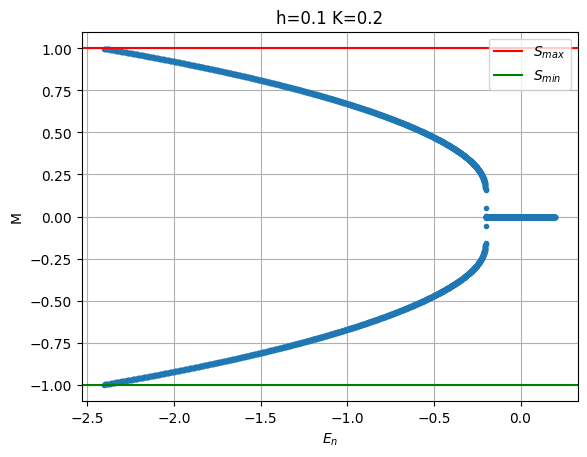

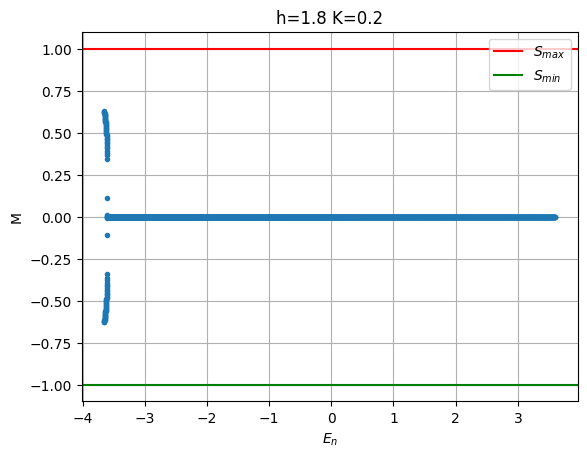

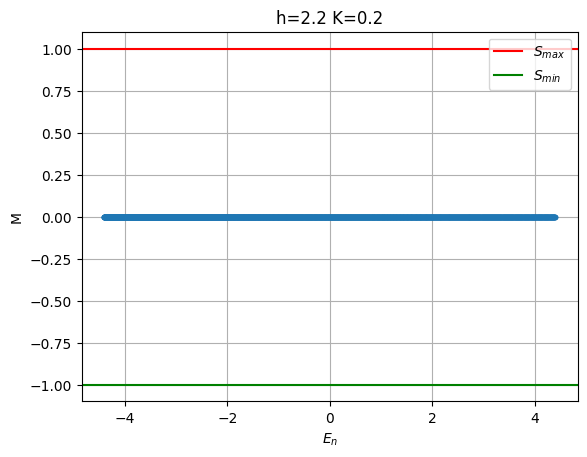

In [6]:
#Creamos una función para poder obtener fácilmente el diagrama de fases dado un valor de la cte de acoplo h
def diagrama_de_fases(h,K,N):
    s=1/2#Spin individual
    S=int(N*s)#Spin total
    Ms=np.arange(S, -S - 1, -1)
    Ms=Ms.astype(float)
    #Matriz S_z----------------
    S_z=np.diag(Ms)
    #Matriz S_+----------------

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x

    S_x=1/2 * (S_mas + S_menos)
    J=1
    epsilon=10**(-6)
    H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x-(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms) + epsilon*S_z

    #Obtenemos las autoenergías diagonalizando la matriz:
    autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))
    magn=[]
    for i in range(int(N+1)):
        magn.append((autovectores[:,i] @ (Ms*autovectores[:,i]).T)*1/(N/2))  
    #Representación del valor promedio de S_z frente a las energías obtenidas
    mt.plot(autoenergias/(N/2),np.array(magn),'.')
    mt.axhline(y=1,color='red',label="$S_{max}$")
    mt.axhline(y=-1,color='green',label="$S_{min}$")
    mt.xlabel("$E_{n}$")
    mt.ylabel("M")
    mt.title(f'h={h} K={K}')
    mt.legend()
    mt.grid()
    
    return
diagrama_de_fases(0.1,0.2,3000)
mt.show()
diagrama_de_fases(1.8,0.2,3000)
mt.show()
diagrama_de_fases(2.2,0.2,3000)
mt.show()

Una manera más visual de entender este comportamiento es observando como cambia la forma de la energía con M para distintos valores de h. Mientras que para h>2J la forma es del tipo:

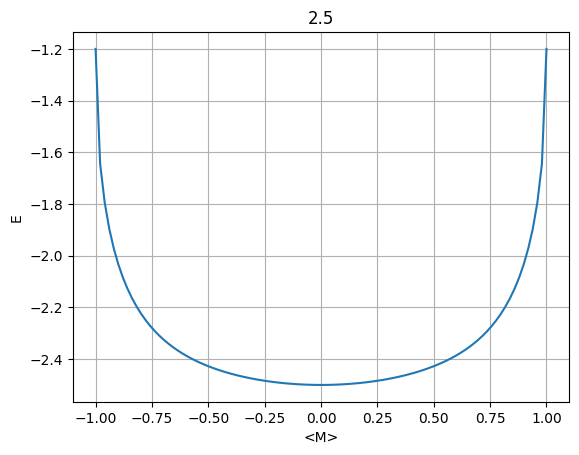

In [26]:
x=np.linspace(-1,1,100)
mt.plot(x,-x**2-0.2*x**4-2.5*np.sqrt(1-x**2))
mt.title(h)
mt.grid()
mt.xlabel("<M>")
mt.ylabel("E")
mt.show()

Para h<2J es del tipo:

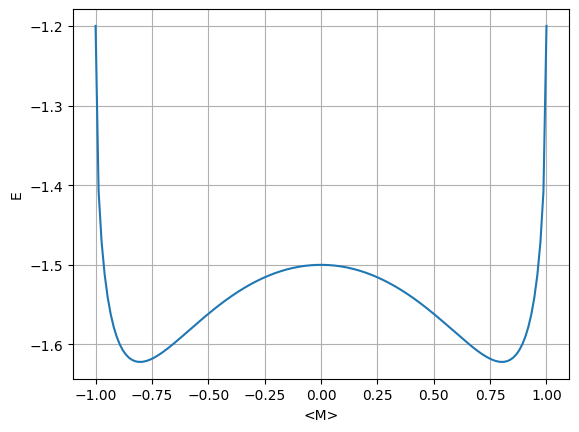

In [29]:
x=np.linspace(-1,1,150)
mt.plot(x,-x**2-0.2*x**4-1.5*np.sqrt(1-x**2))
mt.grid()
mt.xlabel("<M>")
mt.ylabel("E")
mt.show()

Esto hace que el mínimo de energía se sitúe en M=0 para h>2J y en M $\neq$ 0 para h<2J, siendo una ruptura espontánea de la simetría la que decantará en que magnetización, positiva o negativa, se situará. También podemos representar M en el estado fundamental T = 0 en función de h con un K fijo en ese intervalo para ver que la función es analítica en todos los puntos y por tanto es una transición de segundo orden como se espera de la teoría.

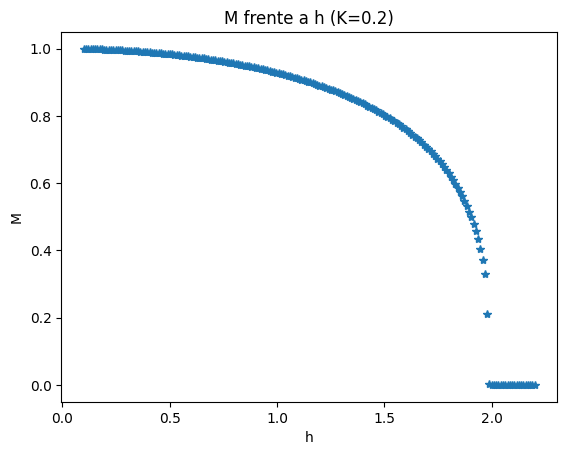

In [7]:
hp=np.linspace(0.1,2.2,200)
def Mf(N,h,K):
    s=1/2#Spin individual
    S=int(N*s)#Spin total
    Ms=np.arange(S, -S - 1, -1)
    Ms=Ms.astype(float)
    #Matriz S_z----------------
    S_z=np.diag(Ms)
    #Matriz S_+----------------

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x

    S_x=1/2 * (S_mas + S_menos)
    J=1
    epsilon=10**(-6)
    H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x-(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms) + epsilon*S_z

    #Obtenemos las autoenergías diagonalizando la matriz:
    autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))
    M=autovectores[:,0] @ (Ms*autovectores[:,0]).T*1/(N/2)
    return np.abs(M)
Mf_vect=np.vectorize(Mf)

mt.plot(hp,Mf_vect(2000,hp,0.2),'*')
mt.xlabel("h")
mt.ylabel("M")
mt.title(f'M frente a h (K={0.2})')
mt.show()
    

Si se aumenta el intervalo en las h's se termina observando mejor la continuidad. A continuación, busquemos observar la nueva QPT, una transición de primer orden que ocurre para valores de h>2J a partir de un K concreto. El punto crítico triple teórico se encuentra en h=2J y K=J/4.

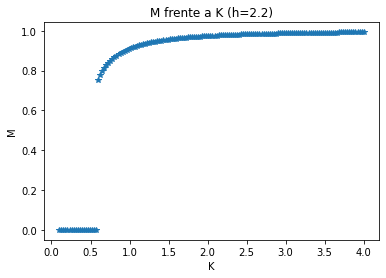

In [282]:
kp=np.linspace(0.1,4,150)
mt.plot(kp,Mf_vect(1000,2.2,kp),'*')
mt.xlabel("K")
mt.ylabel("M")
mt.title(f'M frente a K (h={2.2})')
mt.show()

Como vemos, a partir de un K crítico K_c, el material vuelve a ser ferromagnético pese a situarse en la región h>2J. Aquí podemos observar la no analiticidad de la función M(K) lo que efectivamente nos indica que es una transición de primer orden. Lo que esta ocurriendo aquí es un cambio de la función de energía de la forma:

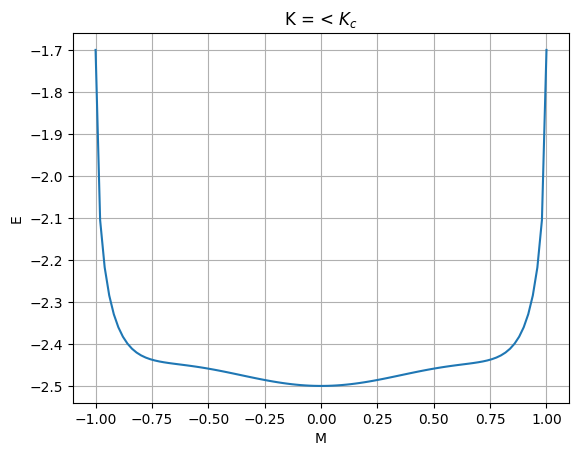

In [10]:
x=np.linspace(-1,1,100)
mt.plot(x,-x**2-0.7*x**4-2.5*np.sqrt(1-x**2))
mt.xlabel("M")
mt.ylabel("E")
mt.title("K = < $K_{c}$")
mt.grid()
mt.show()

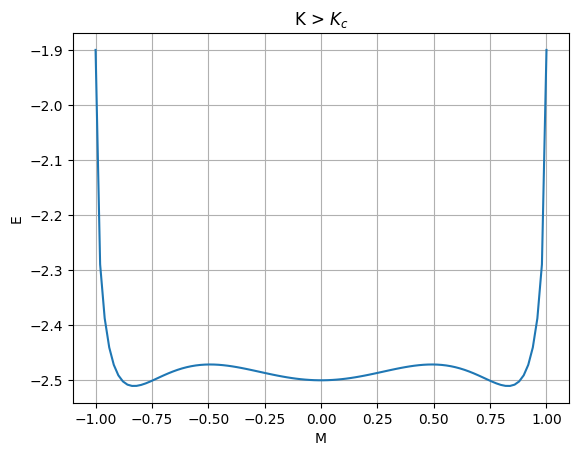

In [11]:
x=np.linspace(-1,1,100)
mt.plot(x,-1*x**2-0.9*x**4-2.5*np.sqrt(1-x**2))
mt.xlabel("M")
mt.ylabel("E")
mt.title("K > $K_{c}$")
mt.grid()
mt.show()

Veamos cómo queda la magnetización M en función de las autoenergías cuando K>$K_{c}$. Simulemos el caso de h=2.2, para el que sabemos que a partir de aproximadamente 0.7 el material se vuelve ferromagnético M $\neq$ 0 en el estado fundamental. Como vemos, la estructura de la energía daría lugar a autoestados con M=0 y M $\neq$ 0 al mismo tiempo en una zona del espectro, a la vez que por debajo de una energía únicamente ferromagnéticos y por encima de otra paramagnéticos. Un esquema de lo que ocurre se muestra a continuación:

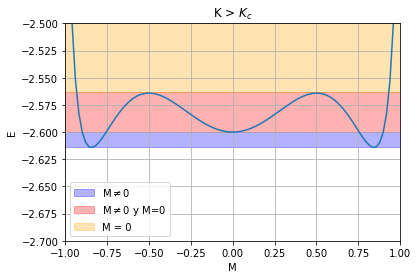

In [269]:
x=np.linspace(-1,1,100)
mt.plot(x,-1*x**2-1*x**4-2.6*np.sqrt(1-x**2))
mt.xlabel("M")
mt.ylabel("E")
mt.title("K > $K_{c}$")
mt.grid()
mt.ylim([-2.7,-2.5])
mt.xlim([-1,1])
mt.axhspan(-2.614, -2.6, color='blue', alpha=0.3, label=r"M$\neq$0")
mt.axhspan(-2.6, -2.563, color='red', alpha=0.3, label=r"M$\neq$0 y M=0")
mt.axhspan(-2.563, -2.5, color='orange', alpha=0.3, label="M = 0")
mt.legend()
mt.show()

Representemos un caso concreto y hagamos zoom a la zona de bajas energías para observar este comportamiento:

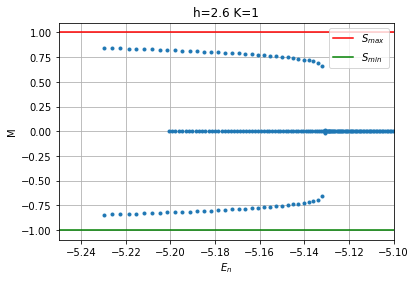

In [274]:
diagrama_de_fases(2.6,1,3220)
#ZOOM---------------
mt.xlim([-5.25,-5.1])
mt.show()


Observamos:

Una estructura donde hay al principio niveles con M distinto de cero, luego con M distinto de cero y cero y al final con M=0, como se esperaba.

Para continuar probamos la expresión calculada con Mathematica que nos da el valor de la K crítica $K_{c}$ en función de h. Obedece la siguiente expresión:
\begin{equation}
    K_{c}^{exact} = \frac{1}{64h} \bigl[27 h^{2}-36h-4+\sqrt{(9h-2)^{3}(h-2)}\bigr]
\end{equation}
Representamos para h=2.2, que es uno de los utilizados antes, para ver si coincide el cambio de magnetización con el valor teórico:

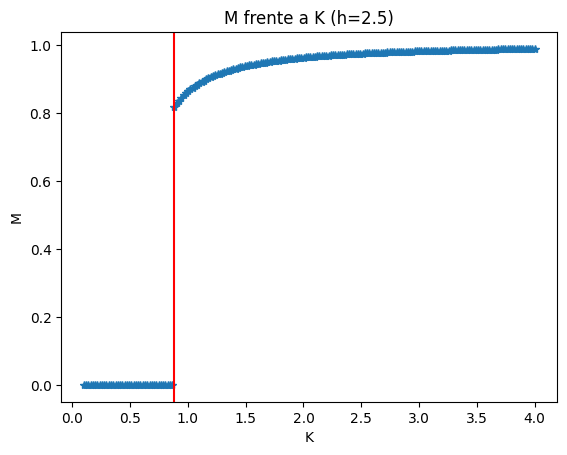

In [13]:
def K_c_R(h):
    return (27*h**2 - 36*h - 4 + np.sqrt( (9*h-2)**3 * (h-2))) / (64*h)
#K_c_R=np.vectorize(K_c_R)
kp=np.linspace(0.1,4,200)
mt.plot(kp,Mf_vect(1000,2.5,kp),'*')
mt.xlabel("K")
mt.ylabel("M")
mt.title(f'M frente a K (h={2.5})')
mt.axvline(x=K_c_R(2.5),color='red',label=r"$K_{c}^{R}$")
mt.show()

Según la aproximación hecha en el paper N. Defenu, D. Mukamel, and S. Ruffo, Ensemble Inequivalence in Long-Range Quantum Systems, Phys. Rev. Lett. 133, 050403 (2024) la línea de transición de primer orden se encuentra en 
\begin{equation}
    K_{c}^{approx}=\frac{h}{8}+\frac{1}{2} \sqrt{\frac{h(h-2)}{2}}
\end{equation}
con J=1. Representamos ahora las líneas de transición de ambas teorías y comparamos con los resultados de nuestra simulación:

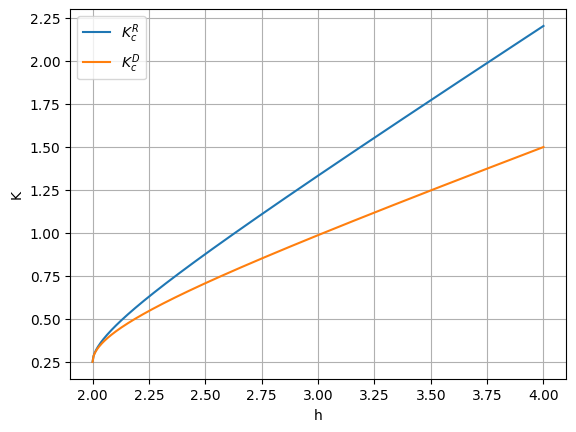

In [14]:
def K_c_D(h):
    return h/8 + (1/2)*np.sqrt((h*(h-2))/2)

hp=np.linspace(2,4,500)
mt.plot(hp,K_c_R(hp),label=r"$K_{c}^{R}$")
mt.plot(hp,K_c_D(hp),label=r"$K_{c}^{D}$")
mt.xlabel("h")
mt.ylabel("K")
mt.legend()
mt.grid()
mt.show()

Como podemos ver la diferencia entre predicciones se hace notable rápidamente. Superpongamos ambas líneas críticas en nuestra representación de M frente a K para un valor de h (h=2.2), par así observar cual coincide con nuestra simulación.

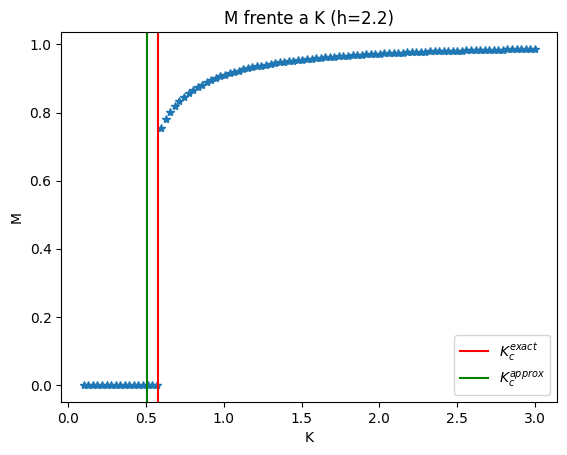

In [17]:
kp=np.linspace(0.1,3,100)
mt.plot(kp,Mf_vect(1000,2.2,kp),'*')
mt.xlabel("K")
mt.ylabel("M")
mt.title(f'M frente a K (h={2.2})')
mt.axvline(x=K_c_R(2.2),color='red',label=r"$K_{c}^{exact}$")
mt.axvline(x=K_c_D(2.2),color='green',label=r"$K_{c}^{approx}$")
mt.legend()
mt.show()

Como podemos ver, incluso para un valor de $h$ cercano a 2 la línea crítica aproximada es inexacta, mientras que la expresión de Mathematica se da a la perfección.

Finalmente, escojamos h=2.5 y observemos de nuevo el comportamiento cuando K<$K_{c}$ y K>$K_{c}$ en el límite de la línea crítica y estudiemos los intervalos de convivencia.

In [20]:
#Creamos una función para poder obtener fácilmente el diagrama de fases dado un valor de la cte de acoplo h
def diagrama_de_fases(h,K,N):
    s=1/2#Spin individual
    S=int(N*s)#Spin total
    Ms=np.arange(S, -S - 1, -1)
    Ms=Ms.astype(float)
    #Matriz S_z----------------
    S_z=np.diag(Ms)
    #Matriz S_+----------------

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x

    S_x=1/2 * (S_mas + S_menos)
    J=1
    epsilon=0
    H=-(4*J)/N * np.diag(Ms*Ms)-2*h*S_x-(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms) + epsilon*S_z

    #Obtenemos las autoenergías diagonalizando la matriz:
    autoenergias, autovectores = diagonalizar_tridiagonal_simetrica(np.diag(H), np.diag(H, k=1))
    magn=[]
    for i in range(int(N+1)):
        magn.append((autovectores[:,i] @ (Ms*autovectores[:,i]).T)*1/(N/2))  
    #Representación del valor promedio de S_z frente a las energías obtenidas
    mt.plot(autoenergias/(N/2),np.array(magn),'.')
    mt.xlabel("$E_{n}$")
    mt.ylabel("M")
    mt.title(f'h={h} K={K}')
    mt.grid()
    return


El valor crítico de K para h = 2.5 para Mathematica es 0.8773876464605419


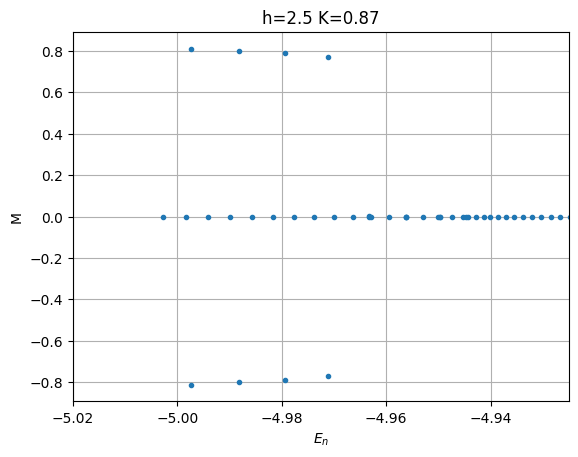

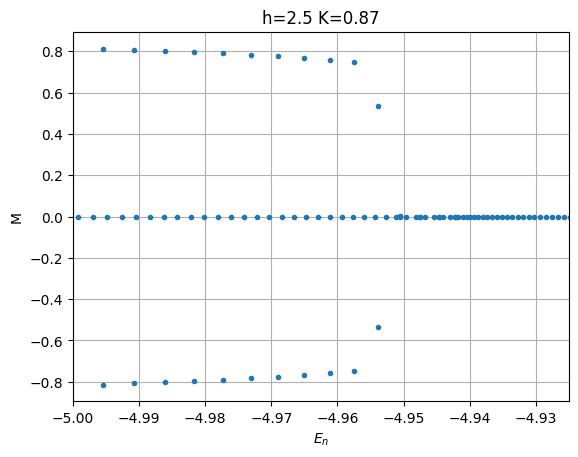

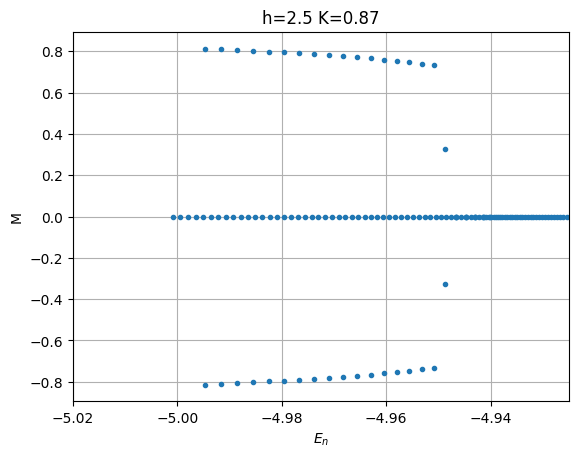

In [23]:
h=2.5
kc=K_c_R(h)
print(f'El valor crítico de K para h = {h} para Mathematica es {kc}')
#Para un valor de K ligeramente menor al crítico
#ZOOM---------------
diagrama_de_fases(h,0.87,1000)
mt.xlim([-5.02,-4.925])
mt.show()
#ZOOM---------------
diagrama_de_fases(h,0.87,2000)
mt.xlim([-5,-4.925])
mt.show()

#ZOOM---------------
diagrama_de_fases(h,0.87,3000)
mt.xlim([-5.02,-4.925])
mt.show()


# Intervalos de K con convivencia de estados ferromagnéticos y paramagnéticos

Analicemos cómo varía el tamaño de los intervalos de K para los que tenemos convivencia de estados M=0 y M$\neq$0. Para tratar de medir su tamaño he buscado en el lado izquierdo a K_c el punto en el que aparecían autoestados con M distinta de 0 conviviendo con estados con M=0, y por el derecho el punto que cumplía la misma condición. Esto lo he hecho para 3 valores de h=2.5,2.6 y 2.9.

   1. En el lado K<$K_{c}$ tenemos una desaparición muy rápida de estas convivencias. Con variaciones de K pequeñas desaparecen. Por el lado K>$K_{c}$, en cambio, estos estados abarcan una franja mucho más grande.
    
   2. Si estos valores de K límites se han medido de forma aproximada, lo que es indudable es que según h aumenta el intervalo de valores de k para los que hay estos estados de convivencia aumenta también. Para h=2.5 $\Delta$K=6.23,  para h=2.6 $\Delta$K=8.15 y  para h=2.5 $\Delta$K=14.94.  El $K_{c}$ para estos valores de h es: $K_{c}$(2.5)=0.87738, $K_{c}$(2.6)=0.97116 y $K_{c}$(2.9)=1.24412.